## 04. Autograd(자동 미분)
- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 자동 미분(Auto Differentiation)
- 이는 코드를 어떻게 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop을 위해 미분값을 자동으로 계산

Epoch [100/1000], Loss: 4.0644
Epoch [200/1000], Loss: 4.0284
Epoch [300/1000], Loss: 4.0150
Epoch [400/1000], Loss: 4.0101
Epoch [500/1000], Loss: 4.0083
Epoch [600/1000], Loss: 4.0076
Epoch [700/1000], Loss: 4.0074
Epoch [800/1000], Loss: 4.0073
Epoch [900/1000], Loss: 4.0073
Epoch [1000/1000], Loss: 4.0072


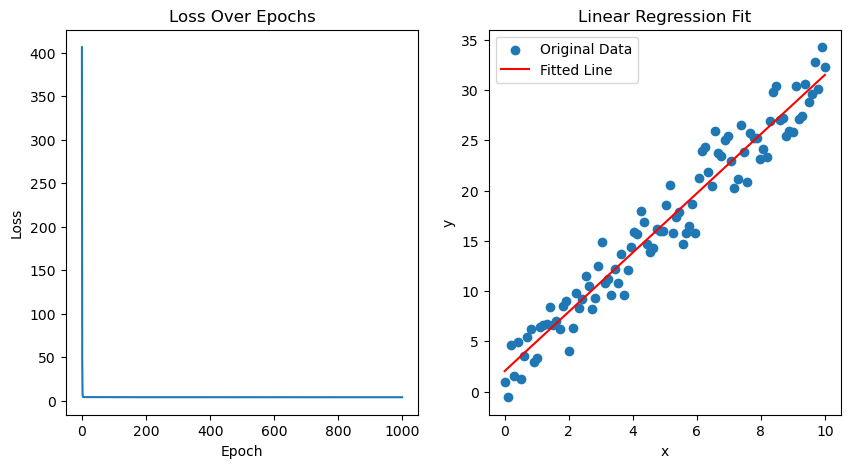

Model Parameters:
linear.weight: tensor([[2.9458]])
linear.bias: tensor([2.0438])


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 데이터 생성
# y = 3x + 2 + noise
x = torch.linspace(0, 10, 100).view(-1, 1)  # 100개의 데이터를 1열로 변환
y = 3 * x + 2 + torch.randn(100, 1) * 2  # 노이즈 추가

# 2. 선형 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법

# 4. 학습 루프
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    outputs = model(x)  # 예측값 계산
    loss = criterion(outputs, y)  # 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label='Original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")
